#Credit EDA & Credit Score Calculation
---




**Problem statement**

To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.




**Importing Libraries & Loading the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Credit_score.csv')

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [ ]:
df.shape

(100000, 27)

**Observations:**


*   The dataset has 1 Lakh rows and 27 columns


*   This dataset is about 12,500 people about their income, monthly spendings etc




In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.describe(include='object')

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10139,12501,16,6261,4,13178,3,7
top,0x1602,CUS_0xd40,January,Langep,#F%$D@*&8,_______,No_Loan_Taken,Standard,1360.45,Yes,Low_spent_Small_value_payments
freq,1,8,12500,48,5572,7062,11408,36479,24,52326,25513


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Observations :**


*   The dataset has so many errors about incorrectlly identifying the data type etc
*   There are lot of null values as well



**Data Cleaning**

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


`Handling Null values `

In [3]:
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Monthly_Inhand_Salary']=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mean()))
df['Type_of_Loan'].fillna('No_Loan_Taken',inplace=True)
df['Num_of_Delayed_Payment']=df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Num_Credit_Inquiries']=df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Credit_History_Age'].replace('NA',np.nan,inplace=True)



In [4]:
df['Credit_Mix'].replace('_',np.nan,inplace=True)
df['Credit_Mix']=df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [5]:
def convert_to_datetime(age_str):
    # Handle potential non-string values
    if not isinstance(age_str, str):
        return pd.NaT  # Return NaT (Not a Time) for non-string values

    parts = age_str.split(' Years and ')
    year = parts[0]

    # Calculate total days (approximate) and create Timedelta
    year = int(year)   # Approximate days in a month
    return year  # Use 'D' for days

# Apply the function to the 'Credit_History_Age' column
df['Credit_History_Age_in_years'] = df['Credit_History_Age'].apply(convert_to_datetime)

In [6]:
df['Credit_History_Age_in_years']=df.groupby('Customer_ID')['Credit_History_Age_in_years'].transform(lambda x: x.fillna(x.max()))

In [7]:
df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan,inplace=True)
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df['Monthly_Balance']=df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [8]:
df['Amount_invested_monthly'].replace('__10000__',np.nan,inplace=True)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)
df['Amount_invested_monthly']=df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))

In [9]:

df['Annual_Income'] = df['Annual_Income'].str.extract(r'([\d.]+)').astype(float)





**Note**


*   Many Numerical columns have special characters induced in them which can make the analysis difficult
*   We have used extract method with regex patterns and removed all the special charactes and changed the data type to int or float from object for numerical columns
  
*   We have used mode  in most of the cases to fill the null values





**Changing incorrect Datatypes**

In [10]:
df['Age'] = df['Age'].str.extract(r'([\d.]+)').astype(int)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.extract(r'([\d.]+)').astype(int)
df['Num_of_Loan']=df['Num_of_Loan'].str.extract(r'([\d.]+)').astype(int)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.extract(r'([\d.]+)').astype(float)



**Treating Outliers for Numerical Columns**

In [11]:
def treat_outliers(df,col,groupby='Customer_ID'):

  Q3=np.percentile(df[col],75)
  Q1=np.percentile(df[col],25)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col]=df.groupby(groupby)[col].transform(lambda x : np.where((x>upper_bound) | (x<lower_bound),x.mode()[0],x))
  return None


In [12]:
# clipping outliers using IQR
treat_outliers(df,'Age')
treat_outliers(df,'Num_of_Delayed_Payment')
treat_outliers(df,'Num_of_Loan')
treat_outliers(df,'Changed_Credit_Limit')
treat_outliers(df,'Num_Credit_Card')
treat_outliers(df,'Interest_Rate')
treat_outliers(df,'Num_Credit_Inquiries')
treat_outliers(df,'Num_Bank_Accounts')




<Axes: xlabel='Num_Bank_Accounts'>

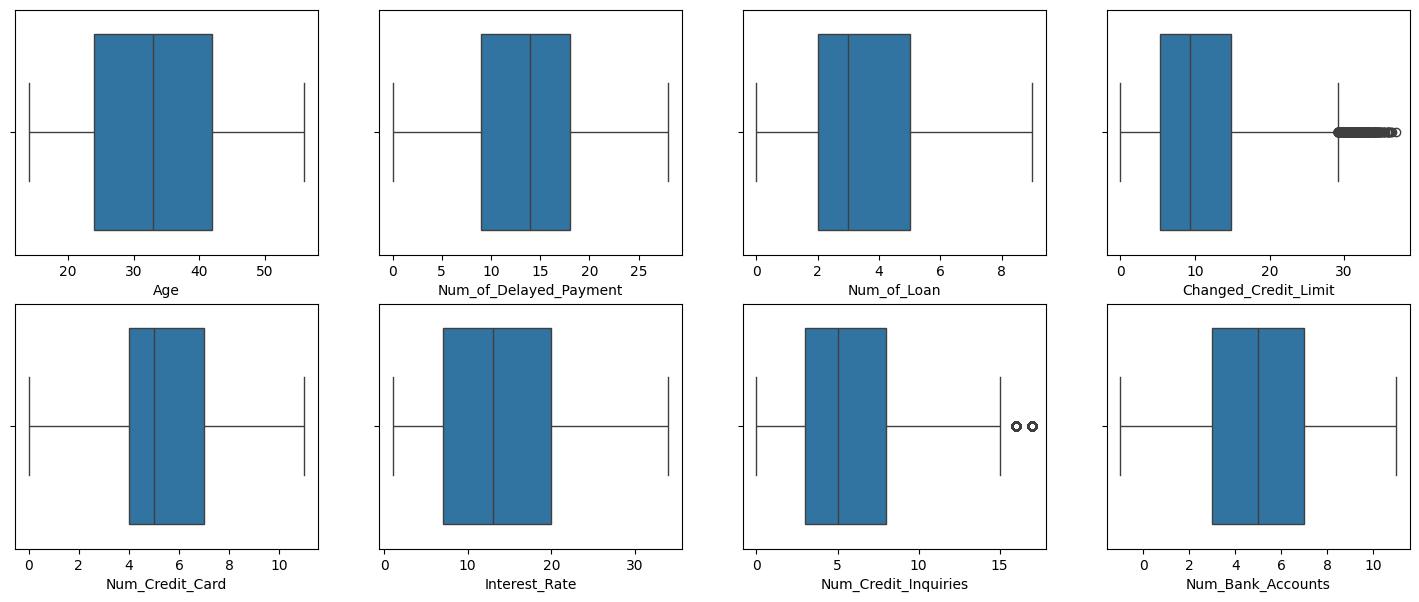

In [13]:
#Final Check for Outliers
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(18,7))
sns.boxplot(x=df['Age'],ax=axes[0,0])
sns.boxplot(x=df['Num_of_Delayed_Payment'],ax=axes[0,1])
sns.boxplot(x=df['Num_of_Loan'],ax=axes[0,2])
sns.boxplot(x=df['Changed_Credit_Limit'],ax=axes[0,3])
sns.boxplot(x=df['Num_Credit_Card'],ax=axes[1,0])
sns.boxplot(x=df['Interest_Rate'],ax=axes[1,1])
sns.boxplot(x=df['Num_Credit_Inquiries'],ax=axes[1,2])
sns.boxplot(x=df['Num_Bank_Accounts'],ax=axes[1,3])



**Note:**
1. We chose not to clip the values for Annual Income and Monthly Inhand Salary, as they may not represent errors or outliers, and altering them could impact future calculations
2. There were many numercial columns with incorrect data types, we have corrected it also.
3. There were many garbage values, we have corrected it using regex patterns

**Note:**
All the Data preprocessing has been done.




*   We changed data types
*   We have handele Null values
*   we have handled outliers as well



**Checking the Distribution of Data**

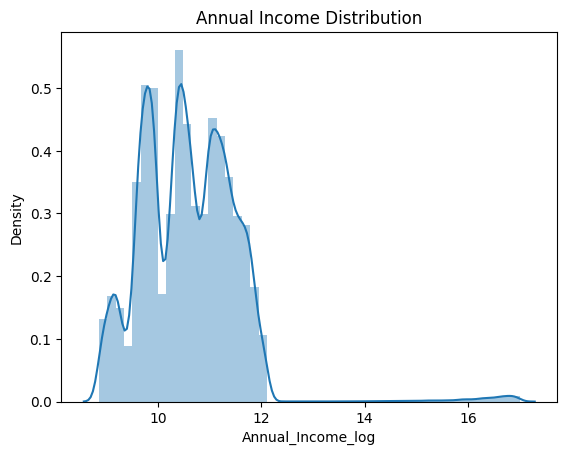

In [14]:
df['Annual_Income_log']=np.log(df['Annual_Income'])
sns.distplot(df['Annual_Income_log'])
plt.title('Annual Income Distribution')
plt.show()




**Note:**
Since the range of values of Annual income are very high we have taken log of the column to show the distribution of data

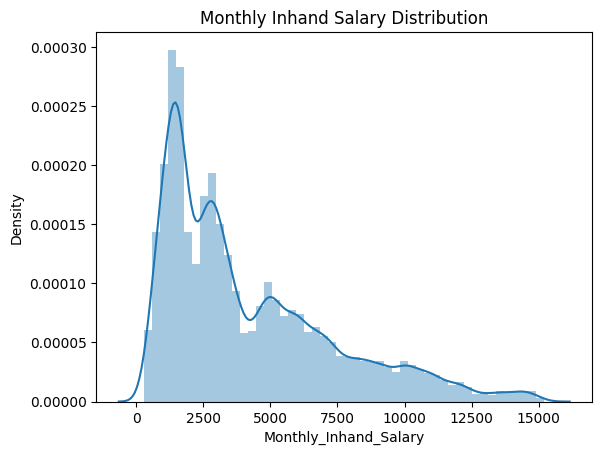

In [ ]:
sns.distplot(df['Monthly_Inhand_Salary'])
plt.title('Monthly Inhand Salary Distribution')
plt.show()

Text(0.5, 1.0, 'Annual Income vs Monthly Inhand Salary')

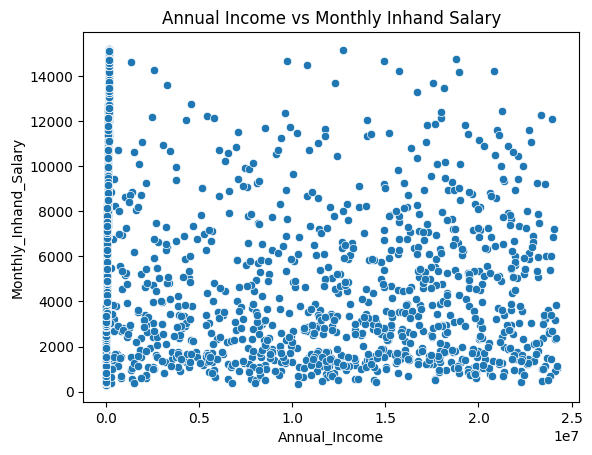

In [15]:
sns.scatterplot(data=df,x=df['Annual_Income'],y=df['Monthly_Inhand_Salary'])
plt.title('Annual Income vs Monthly Inhand Salary')
#plt.show()

**Insights:**
The scatter plot doesn't show a clear linear or non-linear pattern, suggesting that the Monthly Inhand Salary may not strongly depend on Annual Income in a straightforward manner. Let us try to understand this better using heatmap and further analysis

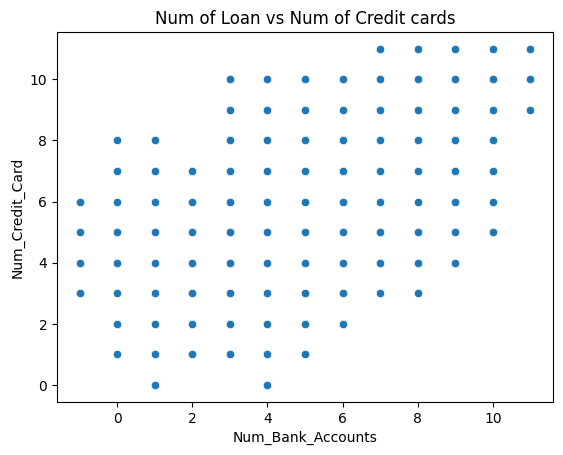

In [ ]:
sns.scatterplot(x=df['Num_Bank_Accounts'],y=df['Num_Credit_Card'])
plt.title('Num of Loan vs Num of Credit cards')
plt.show()

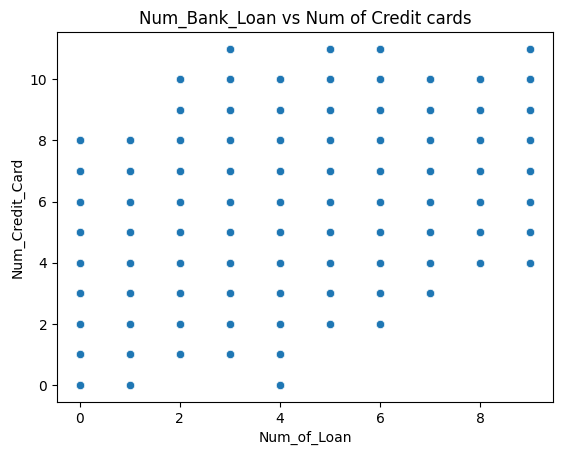

In [ ]:
sns.scatterplot(x=df['Num_of_Loan'],y=df['Num_Credit_Card'])
plt.title('Num_Bank_Loan vs Num of Credit cards')
plt.show()

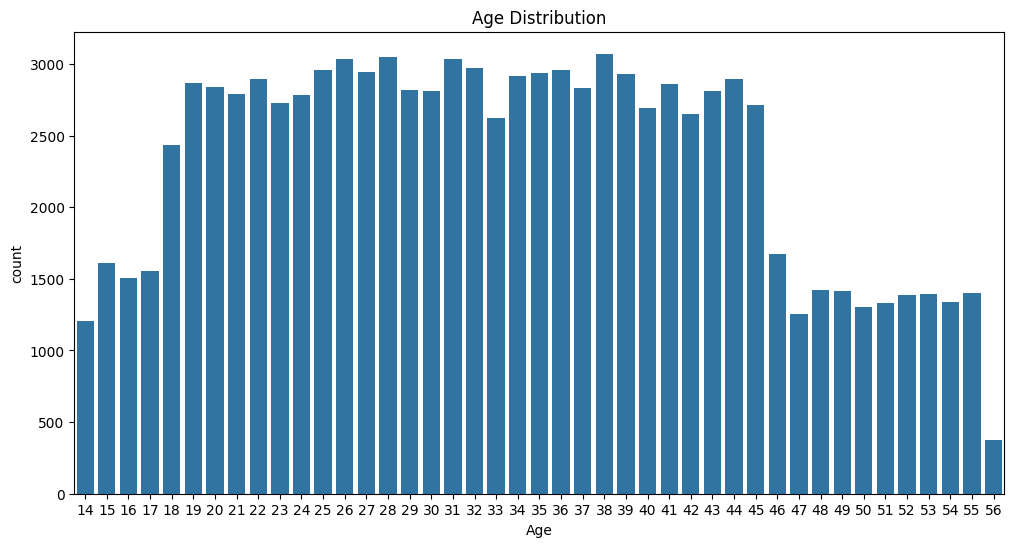

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_in_years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,22
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.629163,22
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.209863,22
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.451310,22
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,22


In [ ]:
#fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
#sns.countplot(df['Num_of_Delayed_Payment'],ax=axes[0])
#sns.countplot(df['Num_Credit_Inquiries'],ax=axes[0])

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

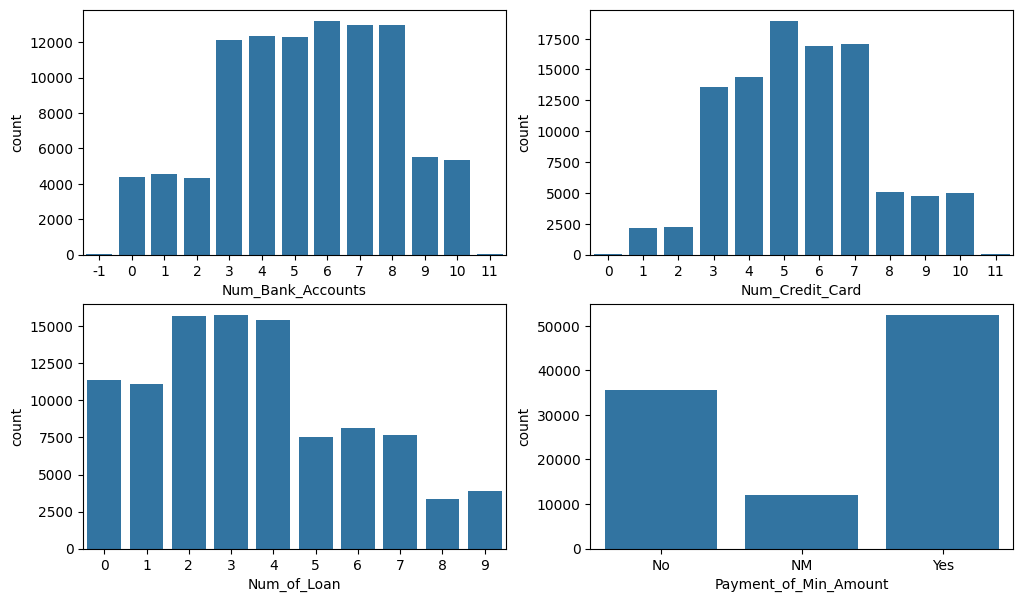

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,7))
sns.countplot(x=df['Num_Bank_Accounts'],ax=axes[0,0])
sns.countplot(x=df['Num_Credit_Card'],ax=axes[0,1])
sns.countplot(x=df['Num_of_Loan'],ax=axes[1,0])
sns.countplot(x=df['Payment_of_Min_Amount'],ax=axes[1,1])


**Insights:**
1. Monthly salary follows a right skewed distribution. Which can be made to Gaussian distribution if need for any analysis
2. Most of the people have 3 to 8 bank accounts and use 3-7 credit cards
3. There appears to be a positive trend between the number of bank accounts and the number of credit cards. This suggests that individuals are likely obtaining credit cards from the banks where they hold their accounts. In many cases, having three bank accounts corresponds to holding approximately three credit cards. This correlation indicates a pattern where people tend to acquire credit cards from their existing banking relationships.
4. There suggests a positive relationship between the number of bank loans and the number of credit cards, with people who have more loans generally holding more credit cards. However, the significant variability also indicates that the relationship is influenced by individual financial behavior, with some people managing both loans and credit cards actively while others may limit their credit card use as their number of loans increases.

**Computing the Credit Score**

In [ ]:
def payment_history_score(row):



  base_score=100
  if row['Num_of_Loan']<=0:
   base_score=base_score
  elif row['Num_of_Loan']<=7:
   base_score=base_score-5
  else:
   base_score= base_score-10

  if row['Num_of_Delayed_Payment']==0:
   base_score=base_score
  elif 1<=row['Num_of_Delayed_Payment']<=3:
   base_score=base_score-5
  elif 4<=row['Num_of_Delayed_Payment']<=7:
   base_score=base_score-10
  else:
   base_score=base_score-15



  if row['Delay_from_due_date']==0:
   base_score=base_score
  elif 1<=row['Delay_from_due_date']<=3:
   base_score=base_score-2
  elif 4<= row['Delay_from_due_date']<=7:
   base_score=base_score-3
  else:
   base_score=base_score-5


  return base_score




In [ ]:
df['Payment_history_score']=df.apply(payment_history_score,axis=1)

In [ ]:
def credit_Utilization(col):
  if col < 10 :
    return 100
  elif 10< col < 30:
    return 95
  elif 30 <col <50:
    return 85
  elif 50<col<70:
    return 75
  else:
    return 55

In [ ]:
bins = [0.0,9.0,30.0,50.0,70.0,100.0]
labels=[100,95,85,70,55]

In [ ]:
df['Credit_Utilization_score']=df['Credit_Utilization_Ratio'].apply(credit_Utilization)

In [ ]:
credit_mix_mapping={
    'Good': 80,
    'Standard' : 60,
    'Bad' : 30
    }

In [ ]:
df['Credit_Mix_score']=df['Credit_Mix'].map(credit_mix_mapping)

In [ ]:
def credit_history_length(years):
  if years < 10 :
    return 30
  elif 10< years < 20:
    return 60
  else:
    return 90

In [ ]:
df['Credit_length_score']=df['Credit_History_Age_in_years'].map(credit_history_length)

TypeError: '<' not supported between instances of 'NaTType' and 'int'

In [ ]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.extract(r'([\d.]+)').astype(float)

In [ ]:
df['Debt_Income_Ratio']=(df['Outstanding_Debt']/df['Monthly_Inhand_Salary'])*100

In [ ]:
df['Debt_Income_Ratio'].max()

1276.2422821438645

In [ ]:
def DTI_Score(col):
  if col<30:
    return 100
  elif 31<col<40:
    return 85
  elif 41<col< 55:
    return 70
  else:
    return 50

In [ ]:
df['Debt_to_income_score']=df['Debt_Income_Ratio'].apply(DTI_Score)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_in_years,Payment_history_score,Credit_Utilization_score,Credit_Mix_score,Credit_length_score,Debt_Income_Ratio,Debt_to_income_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,80.415295,High_spent_Small_value_payments,312.494089,22,83,95,80,90,44.386276,70
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,118.280222,Low_spent_Large_value_payments,284.629163,22,80,85,80,90,44.386276,70
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,81.699521,Low_spent_Medium_value_payments,331.209863,22,83,95,80,90,44.386276,70
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,199.458074,Low_spent_Small_value_payments,223.451310,22,82,85,80,90,44.386276,70
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,41.420153,High_spent_Medium_value_payments,341.489231,22,82,95,80,90,44.386276,70


Creating **'CENT_SCORE'**(personalized credit score).


In [ ]:
df['CENT_value']=(df['Payment_history_score'] * 0.35) + (df['Credit_Utilization_score'] *0.30) + (df['Credit_length_score']*0.15) + (df['Credit_Mix_score']*0.10) + (df['Debt_to_income_score']*0.10)

In [ ]:
df['CENT_SCORE']=df['CENT_value']*8.5

In [ ]:
df[df['CENT_SCORE']>800]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_years,Payment_history_score,Credit_Utilization_score,Credit_Mix_score,Credit_length_score,Debt_Income_Ratio,Debt_to_income_score,CENT_value,CENT_SCORE
8108,0x4582,CUS_0x88f2,May,Himank Sharmag,26,460-29-2746,Media_Manager,17028.31,1663.025833,4,...,285.591219,30,98,95,80,90,2.586851,100,94.3,801.55
8110,0x4584,CUS_0x88f2,July,Himank Sharmag,26,460-29-2746,_______,17028.31,1663.025833,4,...,386.143826,30,98,95,80,90,2.586851,100,94.3,801.55
30920,0xcb2e,CUS_0x2767,January,Krisztinaq,44,749-94-3595,Media_Manager,19251.265_,1445.272083,0,...,381.223691,27,98,95,80,90,15.388106,100,94.3,801.55
39904,0xffd2,CUS_0x3b36,January,Nater,43,814-35-2546,_______,79205.36,6520.446667,1,...,833.600635,24,98,95,80,90,21.151005,100,94.3,801.55
39911,0xffd9,CUS_0x3b36,August,Nater,44,814-35-2546,Scientist,79205.36,6520.446667,1,...,477.969791,25,100,95,80,90,21.151005,100,95.0,807.50
49380,0x13756,CUS_0x7699,May,Miyoungx,22,152-69-5817,Developer,157299.48,13009.290000,3,...,479.626724,33,98,95,80,90,5.004654,100,94.3,801.55
54618,0x15608,CUS_0x8fa8,March,Marjad,51,774-87-0981,_______,40639.06,3572.588333,1,...,380.297736,23,100,95,80,90,23.901998,100,95.0,807.50
54623,0x1560d,CUS_0x8fa8,August,Marjad,51,774-87-0981,Media_Manager,40639.06,3572.588333,1,...,521.965855,23,100,95,80,90,23.901998,100,95.0,807.50
65463,0x19591,CUS_0x39ae,August,Rudegeairu,45,267-92-4521,Developer,88203.74,7415.311667,4,...,379.171036,22,98,95,80,90,15.176031,100,94.3,801.55
66840,0x19da6,CUS_0xb4f,January,Maltezouf,50,910-76-8436,Journalist,56622.3,4469.525000,1,...,516.530490,28,98,95,80,90,2.465363,100,94.3,801.55


**Outline for Calculation of CENTSCORE**

**Note**: CENT score is a personalized score ispired by FICO score. The difference b/w FICO score and CENT score is FICO score  does not take Debt to income ratio while CENT does and also weight system is been adjusted.

CENT SCORE IS calculated based on five primary factors, each with its own weight in the scoring model.Here's a breakdown of these factors:

1. Payment History (35%)
2.Credit Utilization (30%)
3.Length of Credit History(15%)
4.Credi Mix (10%)
5.Debt to Income Ratio (10%)

***`Step1 : Assigning scores***`

--> Each of this Factor is given score based upon different thresholds.
1.For Payment History Base score is set to 100 and factors such as [No of Loan take, No of Delayed payments , Delay from Due date] are taken into considertaion and score has been adjusted to each user based upon the defaults *made*
2. For Credit utilization, score has been allocated based upon creditutilization ratio for example if a person has 24% he would be get a score of 90
3. Similarly scores have been adjusted for other factors as well


**`Step 2: Calculating cent value`**
We have calculated cent value using weighted avg method.Different weights have been assigned to different factors


CENT_value = Payment History Score*(0.35) +
            Credit utilization score * (0.30) +
            Credit length score * (1.15)
            Credit Mix Score  * (0.10)+
            Debt to Income Ratio Score * (0.10)

***`Step 3: Calculating CENT Score`***

We got a cent value bu, it is not actual credit score to get actual score we have to normalize the cent. The formuala used here to so do is

** CENT SCORE = cent value * (850/100) **



**Understanding the Correlation between different Numerical Vriables**

In [ ]:
    df_new=df[['Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','CENT_SCORE','Payment_history_score','Credit_Utilization_score','Credit_length_score','Credit_Mix_score','Debt_to_income_score']]

In [ ]:
correlation_matrix=df_new.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: '34847.84_'

In [ ]:
df[df['CENT_SCORE']>750]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_years,Payment_history_score,Credit_Utilization_score,Credit_Mix_score,Credit_length_score,Debt_Income_Ratio,Debt_to_income_score,CENT_value,CENT_SCORE
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,470.690627,26,83,95,80,90,19.915492,100,89.05,756.925
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,481.505262,27,93,85,80,90,19.915492,100,89.55,761.175
44,0x1642,CUS_0x95ee,May,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,...,690.918664,32,85,95,80,90,9.153899,100,89.75,762.875
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.40,11242.783330,0,...,858.462474,30,90,85,80,90,3.132320,100,88.50,752.250
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.40,10469.207760,0,...,1038.569407,30,90,85,80,90,3.363769,100,88.50,752.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99683,0x25e15,CUS_0x68ea,April,Forgiones,47,297-20-0070,Scientist,41646.88,3515.573333,4,...,429.511476,24,82,95,80,90,20.824768,100,88.70,753.950
99881,0x25f3f,CUS_0x47fa,February,Yantoultra Nguif,31,291-51-7240,Mechanic,64511.34,5440.945000,7,...,495.944541,22,87,95,60,90,6.076150,100,88.45,751.825
99949,0x25fa3,CUS_0x51b3,June,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,622.786250,20,82,95,80,90,8.515821,100,88.70,753.950
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,493.341182,28,90,95,80,90,31.124040,85,90.00,765.000


In [ ]:
df[(df['CENT_SCORE']>650) & (df['CENT_SCORE']<750)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_years,Payment_history_score,Credit_Utilization_score,Credit_Mix_score,Credit_length_score,Debt_Income_Ratio,Debt_to_income_score,CENT_value,CENT_SCORE
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,312.494089,22,83,95,80,90,44.386276,70,86.05,731.425
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,284.629163,22,80,85,80,90,44.386276,70,82.00,697.000
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,331.209863,22,83,95,80,90,44.386276,70,86.05,731.425
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,223.451310,22,82,85,80,90,44.386276,70,82.70,702.950
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,341.489231,22,82,95,80,90,44.386276,70,85.70,728.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,479.866228,31,80,85,80,90,14.954386,100,85.00,722.500
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,496.651610,31,80,85,80,90,14.954386,100,85.00,722.500
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,516.809083,31,80,85,80,90,14.954386,100,85.00,722.500
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,319.164979,31,80,85,80,90,14.954386,100,85.00,722.500


In [ ]:
df[df['CENT_SCORE']<650]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Monthly_Balance,Credit_History_Age_in_years,Payment_history_score,Credit_Utilization_score,Credit_Mix_score,Credit_length_score,Debt_Income_Ratio,Debt_to_income_score,CENT_value,CENT_SCORE
56,0x1656,CUS_0x5407,January,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,298.192158,15,75,95,60,60,65.266371,50,74.75,635.375
57,0x1657,CUS_0x5407,February,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,392.196185,14,75,85,60,60,65.266371,50,71.75,609.875
58,0x1658,CUS_0x5407,March,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,260.912402,14,75,85,60,60,65.266371,50,71.75,609.875
59,0x1659,CUS_0x5407,April,Annk,30,500-92-6408,_______,34081.38,2611.115000,8,...,260.080975,14,75,95,60,60,65.266371,50,74.75,635.375
60,0x165a,CUS_0x5407,May,Annk,30,500-92-6408,_______,34081.38,2611.115000,8,...,397.228355,14,75,85,60,60,65.266371,50,71.75,609.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,0x25fdd,CUS_0x8600,April,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,328.301277,5,75,85,30,30,185.071126,50,64.25,546.125
99988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,#F%$D@*&8,Architect,20002.88,1929.906667,10,...,208.047885,6,75,95,30,30,185.071126,50,67.25,571.625
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,_______,20002.88,1929.906667,10,...,307.659291,6,75,85,30,30,185.071126,50,64.25,546.125
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,228.750392,6,75,95,30,30,185.071126,50,67.25,571.625


**Insights:**

1. Nearly 7321 people have good credit score above 750
2. 6,832 people have avg credit score
3.5178 people have a bad credit score
4. Annual income and Debt to income score are positvely corelated
5. Cent score and Annual income have moderate positive co relation which indicates there are high chances if a persons income us high he will be having high credit score



In [ ]:
!